## Obtain a list of file names

In [1]:
import os
train_files = os.listdir("train")

In [2]:
train_files[19]

'cat.1577.jpg'

## Printing Random images from our data

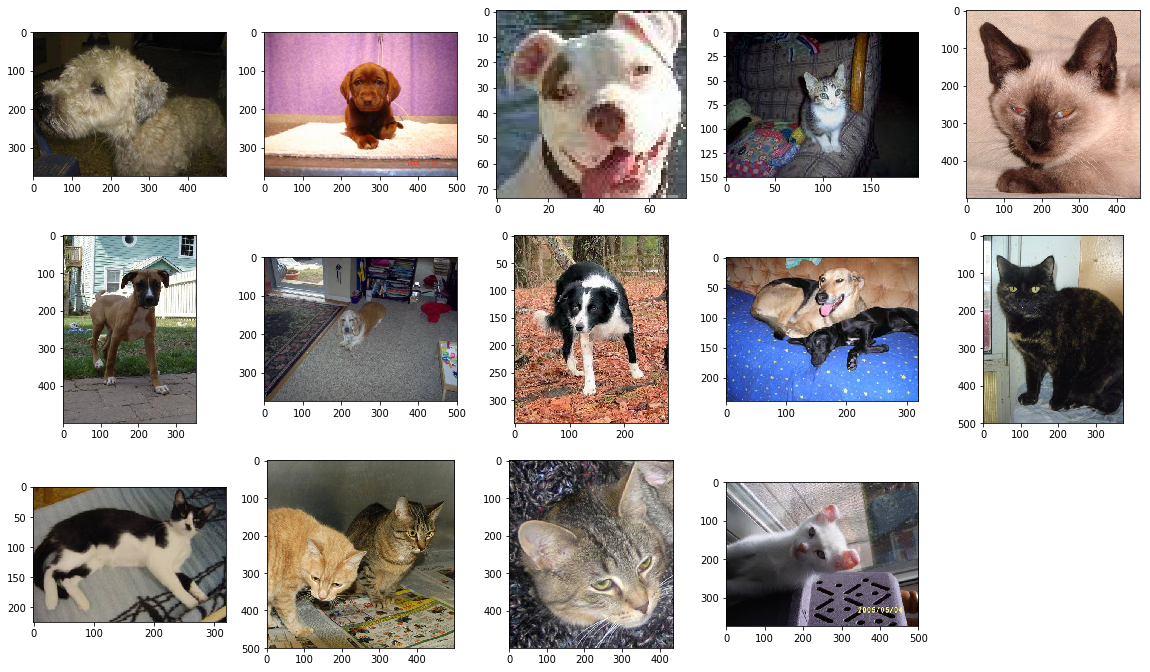

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

fig=plt.figure(figsize=(20, 20))
for i in range(1, 15):
    img_name = train_files[random.randint(0, len(train_files))]
    img=mpimg.imread('train/'+img_name)
    fig.add_subplot(5, 5, i)
    plt.imshow(img)
plt.show()

# Numpy Vector initializations

* We will split the data into training and validation sets. 
* 80% for training and 20% for validation
* Also, we will resize images to (64 * 64 * 3) dimension. Hence the array dimensions

In [4]:
import numpy as np
train_size = int(len(train_files) * 0.8)
train_data_x = np.zeros((train_size, 64, 64, 3))
train_data_y = np.zeros((1, train_size))
valid_data_x = np.zeros((len(train_files) - train_size, 64, 64, 3))
valid_data_y = np.zeros((1, len(train_files) - train_size))


## Use imageio to convert image files to numpy arrays
We create a a Python array of tuples. The tuple contains the numpy array for the image and 1 if it's a dog, else 0

In [5]:
from imageio import imread
train_data = []
for i, im in enumerate(train_files):
    filename = "train/" + im
    image = np.asarray(imread(filename))
    train_data.append((image, 1 if im.split(".")[0] == "cat" else 0))

## Verify if downscaling or upscaling makes sense.

We iterate over all the images and we find that 99% of the images can be easily downscaled to our dimesion of (64, 64, 3)

In [6]:
c = 0
for x,y in train_data:
    c += x.shape[0] >= 64 and x.shape[1] >= 64
c

24959

## Image Resizing

* Iterate over the python list for the entire data
* Resize the image to (64, 64, 3)
* Allocate data to training or validation sets accordingly.
* The `imresize` function in scipy is deprecated. Need to use `skimage` instead. Used the warning package to shut up the deprecated warning message.

In [8]:
import warnings
from scipy import misc
warnings.simplefilter("ignore", DeprecationWarning)
for i, (x, y) in enumerate(train_data):
    resized_image = misc.imresize(x, (64, 64, 3))
    if i < train_size:
        train_data_x[i] = resized_image
        train_data_y[:, i] = y
    else:
        valid_data_x[i - train_size] = resized_image
        valid_data_y[:, i - train_size] = y

## Save data

We use `numpy.savez` to save multiple arrays into a single, uncompressed `.npz` file.

In [9]:
np.savez("train", X=train_data_x, Y=train_data_y)

In [10]:
np.savez("valid", X=valid_data_x, Y=valid_data_y)